In [24]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
streaming_body_2 = client_f6518a60da3c44188ddeb23501d16676.get_object(Bucket='fertilizerrecommendation-donotdelete-pr-ifyecmexm4gjka', Key='Fertilizers_RS_For_Disease_ Prediction.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f6518a60da3c44188ddeb23501d16676 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YWaHl-dxNLC25X52M2q4rX_qbBvfhnwpsW6FoasMRQYx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_f6518a60da3c44188ddeb23501d16676.get_object(Bucket='fertilizerrecommendation-donotdelete-pr-ifyecmexm4gjka', Key='Fertilizers_RS_For_Disease_ Prediction.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

#Mount the drive click on third symbol

In [25]:
pwd

'/home/wsuser/work'

In [26]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()), 'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=False) #
test_datagen=ImageDataGenerator(rescale=1./255) #

In [29]:
x_train=train_datagen.flow_from_directory('/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set', target_size=(128,128), class_mode='categorical', 
                                          batch_size=24)

Found 11386 images belonging to 9 classes.


In [30]:
x_test=test_datagen.flow_from_directory('/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set', target_size=(128,128), class_mode='categorical', 
                                          batch_size=24)

Found 3416 images belonging to 9 classes.


In [31]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [32]:
x_train

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPool2D, Flatten

In [34]:
model=Sequential()
model.add(Convolution2D(64,(3,3), input_shape=(128,128,3),activation='relu'))


In [35]:
model.add(MaxPool2D(pool_size=(2,2)))

In [36]:
model.add(Flatten())

Hidden Layers

In [37]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

Output Layer

In [38]:
model.add(Dense(9,activation='softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 254016)            0         
                                                                 
 dense (Dense)               (None, 300)               76205100  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 9)                 1359      
                                                        

In [40]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
len(x_train)/24

19.791666666666668

In [42]:
len(x_test)/24

5.958333333333333

In [43]:
model.fit(x_train,steps_per_epoch=20,validation_data=x_test,validation_steps=6,epochs=10)

Epoch 1/10
20/20 [==============================] - 23s 1s/step - loss: 5.7631 - accuracy: 0.1854 - val_loss: 2.1808 - val_accuracy: 0.2014
Epoch 2/10
20/20 [==============================] - 21s 1s/step - loss: 1.9738 - accuracy: 0.2688 - val_loss: 1.7807 - val_accuracy: 0.4375
Epoch 3/10
20/20 [==============================] - 21s 1s/step - loss: 1.6603 - accuracy: 0.4208 - val_loss: 1.2471 - val_accuracy: 0.6111
Epoch 4/10
20/20 [==============================] - 22s 1s/step - loss: 1.4609 - accuracy: 0.4896 - val_loss: 1.4329 - val_accuracy: 0.5069
Epoch 5/10
20/20 [==============================] - 21s 1s/step - loss: 1.2186 - accuracy: 0.5938 - val_loss: 1.3031 - val_accuracy: 0.5208
Epoch 6/10
20/20 [==============================] - 22s 1s/step - loss: 1.2245 - accuracy: 0.5875 - val_loss: 0.9486 - val_accuracy: 0.7014
Epoch 7/10
20/20 [==============================] - 21s 1s/step - loss: 1.0615 - accuracy: 0.6292 - val_loss: 1.3578 - val_accuracy: 0.5556
Epoch 8/10
20/20 [==

In [44]:
ls

'Dataset Plant Disease'/


In [45]:
model.save('Veg_pathon.h5')

In [46]:
ls

'Dataset Plant Disease'/   Veg_pathon.h5


Test the model

In [16]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [17]:
model=load_model('Veg_pathon.h5')

OSError: No file or directory found at Veg_pathon.h5

In [25]:
img=image.load_img('/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ae645b07-4c93-45d7-9ee6-83cbf1201e8b___NREC_B.Spot 9119.JPG')

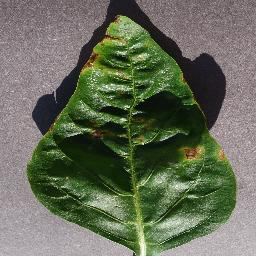

In [26]:
img

In [27]:
img=image.load_img('/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ae645b07-4c93-45d7-9ee6-83cbf1201e8b___NREC_B.Spot 9119.JPG',target_size=(128,128))

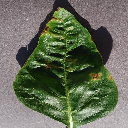

In [28]:
img


In [29]:
x=image.img_to_array(img)
x

array([[[114., 102., 106.],
        [124., 112., 116.],
        [140., 128., 132.],
        ...,
        [114., 102., 104.],
        [129., 117., 119.],
        [136., 124., 126.]],

       [[117., 105., 109.],
        [ 93.,  81.,  85.],
        [118., 106., 110.],
        ...,
        [ 93.,  81.,  83.],
        [135., 123., 125.],
        [109.,  97.,  99.]],

       [[123., 111., 115.],
        [125., 113., 117.],
        [100.,  88.,  92.],
        ...,
        [130., 118., 120.],
        [128., 116., 118.],
        [106.,  94.,  96.]],

       ...,

       [[178., 172., 176.],
        [171., 165., 169.],
        [172., 166., 170.],
        ...,
        [205., 199., 201.],
        [183., 177., 179.],
        [194., 188., 190.]],

       [[194., 188., 192.],
        [182., 176., 180.],
        [185., 179., 183.],
        ...,
        [194., 188., 190.],
        [180., 174., 176.],
        [190., 184., 186.]],

       [[189., 183., 187.],
        [180., 174., 178.],
        [176., 1

In [30]:
x=np.expand_dims(x,axis=0)
x

array([[[[114., 102., 106.],
         [124., 112., 116.],
         [140., 128., 132.],
         ...,
         [114., 102., 104.],
         [129., 117., 119.],
         [136., 124., 126.]],

        [[117., 105., 109.],
         [ 93.,  81.,  85.],
         [118., 106., 110.],
         ...,
         [ 93.,  81.,  83.],
         [135., 123., 125.],
         [109.,  97.,  99.]],

        [[123., 111., 115.],
         [125., 113., 117.],
         [100.,  88.,  92.],
         ...,
         [130., 118., 120.],
         [128., 116., 118.],
         [106.,  94.,  96.]],

        ...,

        [[178., 172., 176.],
         [171., 165., 169.],
         [172., 166., 170.],
         ...,
         [205., 199., 201.],
         [183., 177., 179.],
         [194., 188., 190.]],

        [[194., 188., 192.],
         [182., 176., 180.],
         [185., 179., 183.],
         ...,
         [194., 188., 190.],
         [180., 174., 176.],
         [190., 184., 186.]],

        [[189., 183., 187.],
       

In [31]:
y=np.argmax(model.predict(x),axis=1)
y

array([1])

In [32]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [33]:
index=['Pepper_BS','Pepper_H','Potato_EB','Potato_LB','Potato_H','Tomato_BS','Tomato_blight','Tomato_mold','Tomato_H']
index[y[0]]

'Pepper_H'

In [34]:
img=image.load_img("/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/bb3d6df0-683e-4f04-afaf-277a36edad6c___RS_Early.B 9070.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Pepper_BS','Pepper_H','Potato_EB','Potato_LB','Potato_H','Tomato_BS','Tomato_blight','Tomato_mold','Tomato_H']
index[y[0]]

[2]


'Potato_EB'

In [35]:
img=image.load_img("/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Tomato___Bacterial_spot/b179b3d0-80cf-4dbf-9e88-b3e9b4a93b3b___GCREC_Bact.Sp 3659.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Pepper_BS','Pepper_H','Potato_EB','Potato_LB','Potato_H','Tomato_BS','Tomato_blight','Tomato_mold','Tomato_H']
index[y[0]]

[8]


'Tomato_H'

In [36]:
img=image.load_img("/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Tomato___Late_blight/b19055d9-6a5d-4b73-90a5-3b3685ac344a___GHLB2 Leaf 8729.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Pepper_BS','Pepper_H','Potato_EB','Potato_LB','Potato_H','Tomato_BS','Tomato_blight','Tomato_mold','Tomato_H']
index[y[0]]

[8]


'Tomato_H'

In [37]:
img=image.load_img("/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Tomato___Leaf_Mold/ae1a8d9f-85a8-4d62-9700-b31bf1dd7a78___Crnl_L.Mold 8659.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Pepper_BS','Pepper_H','Potato_EB','Potato_LB','Potato_H','Tomato_BS','Tomato_blight','Tomato_mold','Tomato_H']
index[y[0]]

[8]


'Tomato_H'

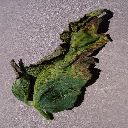

[8]


'Tomato_H'

In [38]:
img=image.load_img("/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Tomato___Septoria_leaf_spot/c363173e-e72f-4aeb-937b-29f60598736d___JR_Sept.L.S 8563.JPG",target_size=(128,128))
img.show()
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Pepper_BS','Pepper_H','Potato_EB','Potato_LB','Potato_H','Tomato_BS','Tomato_blight','Tomato_mold','Tomato_H']
index[y[0]]

In [1]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 19.9 MB/s eta 0:00:01


In [47]:
from ibm_watson_machine_learning import APIClient 
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"egsjLjIMUHSN6mh19HwM8a4t_9IRJHxOsjL8sKB2xNqX"
}

In [48]:
client = APIClient(wml_credentials)

In [49]:
def guid_space_name(client,veg_fruit_deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==veg_fruit_deploy)['metadata']['id'])

In [50]:
space_uid = guid_space_name(client,'veg_fruit_deploy')
print(space_uid)

8a361b38-0b5b-484e-bd9a-ebb17be8a0b2


In [51]:
client.set.default_space(space_uid)

'SUCCESS'

In [52]:
!tar -zcvf Veg-pathon-model.tgz Veg_pathon.h5

Veg_pathon.h5


In [53]:
ls

'Dataset Plant Disease'/   Veg_pathon.h5   Veg-pathon-model.tgz


In [56]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [57]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [58]:
model_details=client.repository.store_model(model='Veg-pathon-model.tgz',
    meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
    })

In [59]:
model_id=client.repository.get_model_id(model_details)
model_id

'd6dbe398-e77a-48b0-9671-92238cae64d2'

In [60]:
ls

'Dataset Plant Disease'/   Veg_pathon.h5   Veg-pathon-model.tgz
